# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            # Load pickled data
import pickle
import numpy as np
import csv



In [2]:
#import from cifar10 dataset
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
def loadGermanSigns():
    training_file = 'train.p'
    testing_file = 'test.p'

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

    X_train, y_train = train['features'], train['labels']
    X_test, y_test = test['features'], test['labels']
    print(X_train.shape, y_train.shape)
    print(y_train)
    print('loaded german signs')
    n_classes = len(list(csv.reader(open('signnames.csv')))) - 1 #ignore header
    return X_train, y_train, X_test, y_test, n_classes

def loadCifar10():
    (X_train, y_train), (X_test, y_test) = cifar10.load_data()
    y_train = np.reshape(y_train, -1)
    y_test = np.reshape(y_test, -1)
    print(X_train.shape, y_train.shape)
    print(y_train)
    print('loaded cifar10 signs')
    n_classes = 10
    return X_train, y_train, X_test, y_test, n_classes


In [4]:
X_train, y_train, X_test, y_test, n_classes = loadGermanSigns()
#X_train, y_train, X_test, y_test, n_classes = loadCifar10()

(39209, 32, 32, 3) (39209,)
[ 0  0  0 ..., 42 42 42]
loaded german signs


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [5]:


### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (32,32,3)

# TODO: How many unique classes/labels there are in the dataset.
#n_classes = len(list(csv.reader(open('signnames.csv')))) - 1 #ignore header
#n_classes = 10

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

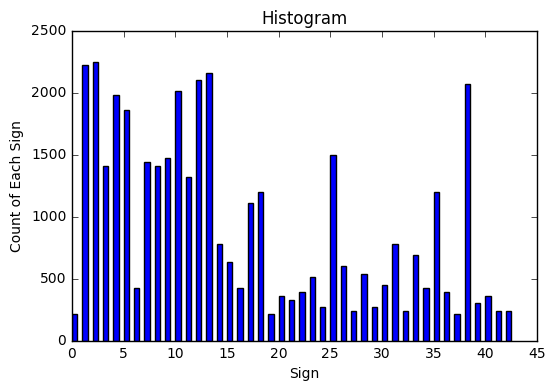

(43,) (43, 32, 32, 3)


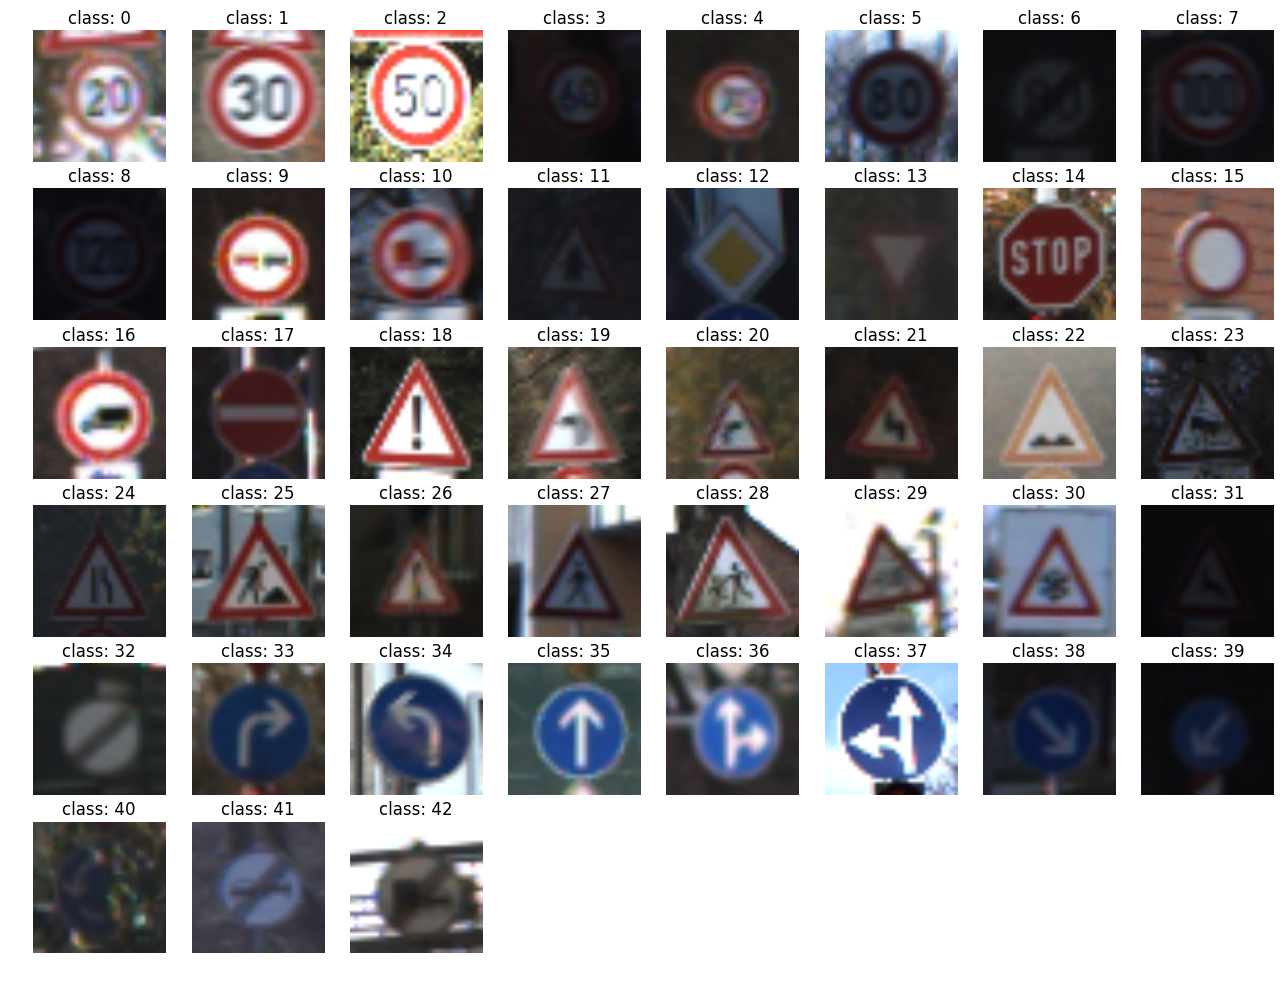

In [6]:
### Data exploration visualization goes here.
import random

import matplotlib.pyplot as plt
import cv2
# Visualizations will be shown in the notebook.
%matplotlib inline

X_train_sample_size = np.bincount(y_train)

fig, ax = plt.subplots()
ax.bar(range(n_classes), np.bincount(y_train), 0.5, color='b')
ax.set_xlabel('Sign')
ax.set_ylabel('Count of Each Sign')
ax.set_title('Histogram')
plt.show()

X_train_sample = np.array([])

plt.figure(figsize=(16, 16))
for c in range(n_classes):
    i = random.choice(np.where(y_train == c)[0])
    plt.subplot(8, 8, c+1)
    plt.axis('off')
    plt.title('class: {}'.format(c))
    plt.imshow(X_train[i])
    #_train_sample = np.append(X_train_sample, X_train[i])
    tmp_image = np.reshape(X_train[i], (1,32,32,3))
    X_train_sample= np.append(X_train_sample, tmp_image)

X_train_sample = np.reshape(X_train_sample, (n_classes,32,32,3))
print(X_train_sample_size.shape, X_train_sample.shape)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.

#### Shuffling training data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [8]:
### Setup tensorflow

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 1
BATCH_SIZE = 128

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

## Answer to Question 1

I tried to do the following during preprocessing.

1. Shuffling training and testing data
2. Normalizing data between range -0.5 to 0.5 . I added normalize step to prevent local maxima and to improve the performance of the model. 
3. Splitting training data into training and validation sets

The above two were described in the CNN class and project, so it was easy.

I am going to try to mutate the training set to generate more training data out of the training set. I tried rotating images by 10 degrees to create 2x training data.

Rotate the entire training image set by 10 degrees. This will result in 2x training data.


**Answer:**

#### A. Splitting

Splitting data into training and validation set. The goal here is to set aside 20% of training data so that we can validate the accuracy of the model. Note that this validation will not totally reveal any flaws in overfitting. If a model is overfitted, then validation data (since it is from the same pool) can also be highly accurate.

In [9]:
### and split the data into training/validation/testing sets here.

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42)


#### B. Normalizing

##### Why normalize
Pixel values in an image will vary from 0 to 255 . Thus, loss/error produced during training could be comparable to the actual values. This means that the model will skew towards x/y combination of higher values. Thus, normalization helps in making sure that every x/y combination has equal impact on the model.

**Normalization Technique**

I tried two normalization technique. Both were borrowed from samples provided in various quizes.

__Range -0.5 to 0.5__ : All the values of image were centered around mean=0 and range (-0.5, +0.5) .
__min/max normalization from 0.1 to 0.9:__ In this mean will be greater than 0

I got better results from range -0.5 to 0.5 which suggests that normalizing around mean~0 might be better in certain cases.

While I don't fully understand yet the difference between normalization techniques, I would certainly prefer any normalization center around mean=0 as it might help the model get to a maxima faster.

In [10]:
### normalize the data between range -0.5 to 0.5
def normalize_between_plus_min_05(image_data):
    image_data = image_data.astype('float32')
    image_data = image_data / 255 - 0.5
    return image_data

### Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

def normalize(image_data):
    #return normalize_grayscale(image_data)
    return normalize_between_plus_min_05(image_data)

X_train = normalize(X_train)
X_validation = normalize(X_validation)

#### C. Augmentation by rotation

We can rotate the images slightly (about 10 degress) to generate additional training data. This will help our model learn better though there is a increased risk of overfitting


31367
31367
(31367, 32, 32, 3)
(62734, 32, 32, 3)


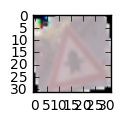

In [11]:
### Generate data additional data (OPTIONAL!)
def rotate(img, angle_range):
    #angle_rotation = np.random.uniform(angle_range)-angle_range/2
    angle_rotation = angle_range
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),angle_rotation,1)
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    return img

def rotate_test():
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    img = rotate(image, 10)
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.imshow(img)
    
rotate_test()

def generateOptionalData(angle):
    X_rotated_images = []
    y_rotated_images = []
    for img,y in zip(X_train, y_train):
        rotated_image = rotate(img, angle)
        X_rotated_images.append(rotated_image)
        y_rotated_images.append(y)
    print(len(X_train))
    print(len(X_rotated_images))
    return X_rotated_images, y_rotated_images

X_rotated_images, y_rotated_images = generateOptionalData(10)
X_t_images = np.array(X_rotated_images)
y_t_images = np.array(y_rotated_images)
print(X_t_images.shape)

X_train = np.concatenate((X_train, X_t_images))
y_train = np.concatenate((y_train, y_t_images))

print(X_train.shape)




### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Training data was shuffled
Training data was split into training and validation
Training data 

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

**Answer**

Architecture of LeNet
(32*32*3) --> (28,28,6 + 6) --> Relu --> Max_Pool(14,14,6 + 6) --> (10,10,16 + 16) --> Relu --> Max_Pool(5,5,16) --> Dropout(0.8) --> flat(400) --> FullyConnected(120) --> Relu --> FullyConnected(84) --> Relu --> FC(10)


In [12]:
### Define your architecture here.

#try with dropout
keep_prob = tf.placeholder(tf.float32)

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    tf.summary.histogram('conv1', conv1_W)
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    tf.summary.histogram('fc1_W', fc1_W)
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [13]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
#### Tensorflow Graph

##training
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
rate = 0.0015

logits = LeNet(x)
softmax = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
tf.summary.scalar('loss', loss_operation)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

##evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.summary.scalar('accuracy', accuracy_operation)
summary_op = tf.summary.merge_all()


In [15]:
### Training the model

with tf.Session() as sess:
    writer = tf.summary.FileWriter('data/tensorboard-logs/', sess.graph)
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            summary, training = sess.run([summary_op,training_operation], feed_dict={x: batch_x, y: batch_y,keep_prob:0.8})
            writer.add_summary(summary)
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    writer.flush()
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

### Feel free to use as many code cells as needed.

Training...

EPOCH 1 ...
Validation Accuracy = 0.918

Model saved


In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    print('loaded')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

loaded
Test Accuracy = 0.740


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

|  Learning Rate | Mu | Sigma | Epoch | Batch Size | Img Transform | Normalize Range | Type of optimizer | Architecture | Validation Accuracy | Test Accuracy |
|  :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: |
|  0.001 |  | 0.1 | 20 | 128 | None | None | Adam | LeNet | 0.972 | Low |
|  0.0005 |  | 0.1 | 20 | 128 | None | None | Adam | LeNet | 0.958 | Low |
|  0.0015 |  | 0.1 | 20 | 128 | None | None | Adam | LeNet | 0.958 | Low |
|  0.0015 |  | 0.1 | 2 | 128 | None | None | Adam | LeNet | 0.848 | 0.788 |
|  0.0015 |  | 0.1 | 5 | 128 | Rotate - 2x | None | Adam | LeNet | 0.951 | 0.877 |
|  0.0015 |  | 0.1 | 5 | 128 | Rotate - 2x | None | Adam | LeNet + probability = 0.4 Dropout | 0.884 | 0.837 |
|  0.0015 |  | 0.1 | 5 | 128 | Rotate - 2x | None | Adam | LeNet + Probability = 0.1 Dropout | 0.555 | 0.525 |
|  0.0015 |  | 0.1 | 5 | 128 | Rotate - 2x | None | Adam | LeNet + Probability = 0.8 Dropout | 0.953 | 0.882 |
|  0.0015 |  | 0.1 | 8 | 128 | Rotate - 2x | None | Adam | LeNet + Probability = 0.8 Dropout | 0.957 | 0.892 |
|  0.0015 |  | 0.1 | 20 | 128 | Rotate - 2x | None | Adam | LeNet + Probability = 0.8 Dropout | 0.983 | 0.923 |
|  0.0015 |  | 0.1 | 25 | 128 | Rotate - 2x | None | Adam | LeNet + Probability = 0.8 Dropout | 0.971 | 0.906 |
|  0.0015 |  | 0.1 | 10 | 128 | Rotate - 2x | None | Adam | LeNet + Probability = 0.8 Dropout | 0.956 | 0.893 |
|  0.0015 |  | 0.1 | 1 | 128 | Rotate - 2x | -0.5 to 0.5 | Adam | LeNet + Probability = 0.8 Dropout | 0.892 | 0.791 |
|  0.0015 |  | 0.1 | 5 | 128 | Rotate - 2x | -0.5 to 0.5 | Adam | LeNet + Probability = 0.8 Dropout | 0.982 | 0.907 |
|  0.0015 |  | 0.1 | 20 | 128 | Rotate - 2x | -0.5 to 0.5 | Adam | LeNet + Probability = 0.8 Dropout | 0.989 | 0.879 |
|  0.0015 |  | 0.1 | 1 | 128 | Rotate - 2x | 0.1 to 0.9 Grayscale | Adam | LeNet + Probability = 0.8 Dropout | 0.859 | 0.765 |
|  0.0015 |  | 0.1 | 5 | 128 | Rotate - 2x | 0.1 to 0.9 Grayscale | Adam | LeNet + Probability = 0.8 Dropout | 0.973 | 0.89 |
|  0.0015 |  | 0.1 | 20 | 128 | Rotate - 2x | 0.1 to 0.9 Grayscale | Adam | LeNet + Probability = 0.8 Dropout | 0.991 | 0.917 |
|  0.0015 |  | 0.1 | 10 | 128 | Rotate - 2x | 0.1 to 0.9 Grayscale | Adam | LeNet + Probability = 0.8 Dropout | 0.985 | 0.907 |

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

1. I tried to play with learning rate. Increasing learning rate reduced accuracy, but with trial and error with smaller epochs, I settled on learning rate of 0.0015

2. I tried adjusting epochs and somehow with larger epochs, I was getting very low accuracy. This could be due to overfitting. So, I introduced dropout to prevent overfitting.

3. Then I thought I introduce more training data. So, I rotated by 10 degress and doubled training data. Ideally, we could use more of such transformation but in interest of time I didn't delve deeper.

4. I was reluctant to change architecture too much because I still don't have enough intuition of reading histogram and graphs for weights to figure out how to adjust the architecture of network.

Eventually, I got decent result with 20 epochs, rotation and 0.8 dropout probability. :-)

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Final Accuracy = 0.200


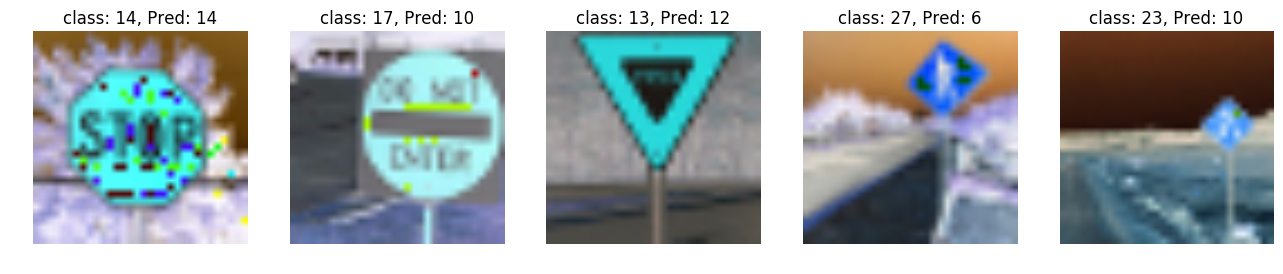

In [17]:
### Load the images and plot them here.
from PIL import Image

def loadImage(name):
    img = Image.open('images/' + name)
    image_array = np.reshape(np.array(img, dtype=np.float32), (32,32,3))
    return image_array

stopSignImg = loadImage('stop-sign1.jpg')
stopSignLabel = 14

doNotEnterImg = loadImage('do-not-enter1.jpg')
noEntryLabel = 17

yieldImg = loadImage('yield-sign1.jpg')
yieldLabel = 13

pedCrossingImg = loadImage('ped-crossing1.jpg')
pedCrossingLabel = 27

slipperyImg = loadImage('slippery1.jpg')
slipperyLabel = 23


X_test_images = np.array([stopSignImg, doNotEnterImg, yieldImg, pedCrossingImg, slipperyImg ])
y_test_images = np.array([stopSignLabel, noEntryLabel, yieldLabel,pedCrossingLabel, slipperyLabel ])

X_test_images_normalized = normalize(X_test_images)

ii=1

    
def plot_prob(images, labels, predictions, probs):
    
    indexes = list(range(n_classes))
    for i in range(0,5):
        plt.figure(figsize=(50, 20))
        plt.subplot(10,10,1)
        plt.axis('off')
        plt.title('Test image. class: {0}, Pred: {1}'.format(labels[i], predictions[i]))
        plt.imshow(images[i])

        
        plt.subplot(10,10,2)
        plt.bar(indexes, probs[i], align='center', alpha=0.5)
        plt.xlim(0,42)
        plt.ylabel('Softmax Probability')
        plt.show()        
        
        plt.figure(figsize=(50, 20))
        
        plt.subplot(10,10,1)
        plt.title('Training data for class: {0}'.format(labels[i]))
        plt.axis('off')
        plt.imshow(X_train_sample[labels[i]])

        plt.subplot(10,10,2)
        plt.title('Training data for predicted: {0}'.format(predictions[i]))
        plt.axis('off')
        plt.imshow(X_train_sample[predictions[i]])

        
        

predictions=[]
softmax_probabilties = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    final_accuracy = evaluate(X_test_images, y_test_images)
    print("Final Accuracy = {:.3f}".format(final_accuracy))
    softmax_probabilties = sess.run(softmax, feed_dict={x:X_test_images_normalized , y: y_test_images, keep_prob: 1.0})
    #print(softmax_probabilties)
    for i in range(0,5):
        predict = np.argmax(softmax_probabilties[i])
        predictions.append(predict)
    plt.figure(figsize=(16, 16))
    ii=1
    for img,label in zip(X_test_images, y_test_images):
        plt.subplot(5,5,ii)
        plt.axis('off')
        plt.title('class: {0}, Pred: {1}'.format(label, predictions[ii-1]))
        plt.imshow(img)
        ii = ii +1        


        
        

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

This part is now divided into two sections.

A. Probability of each image along with a sample of training data of actual class and training data from sample class.

B. Section discussing qualities of images that makes classification difficult

C. Section discusing comparison between the performance of the captured images with that of the test set.


### Answer 7(a)

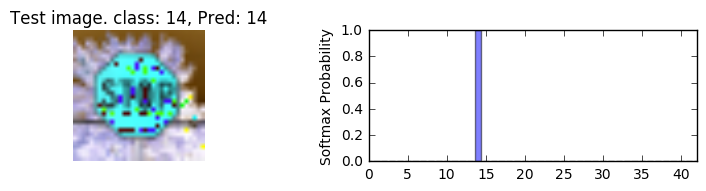

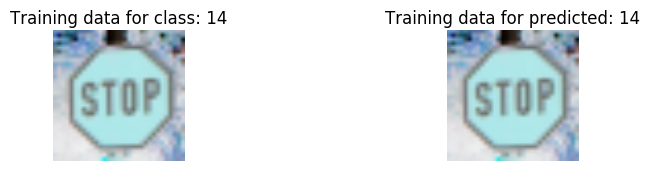

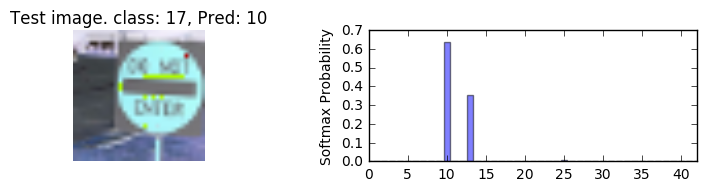

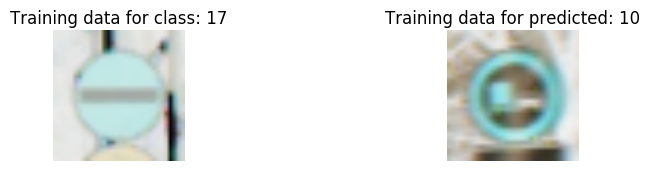

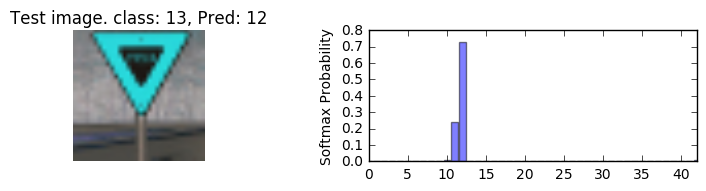

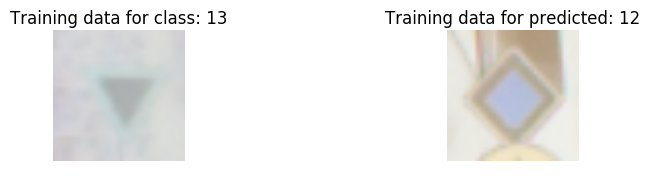

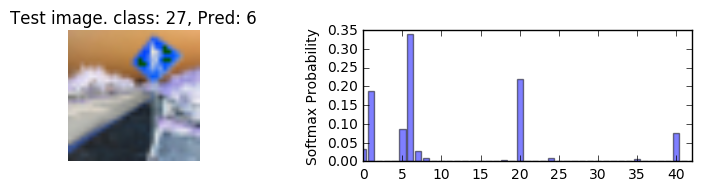

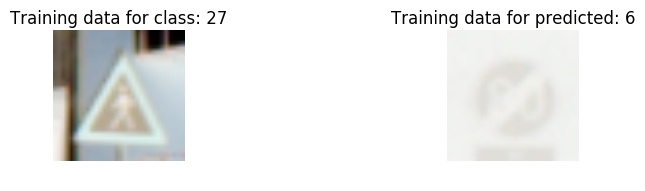

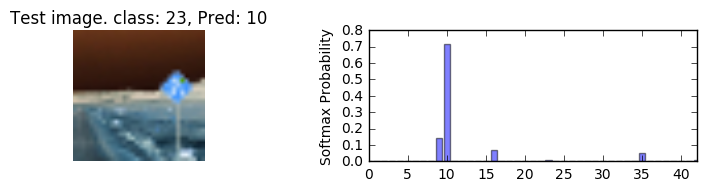

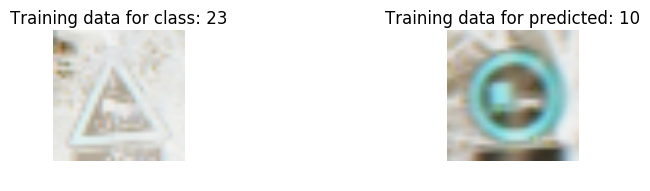

In [18]:
### Visualize the softmax probabilities here.
plot_prob(X_test_images, y_test_images, predictions, softmax_probabilties)

### Answer 7(b) - Classification difficulty

US signs are different from German signs. This will cause issues in classification.

**Image1=Stop sign** This image is a stop sign. Interestingly, german stop sign has english letters and is the same as US stop sign. This test image is suited well for classification from this sample data.

**Image2= Do Not Enter** This test image is a mostly similar to the german sign. However, US "do not enter" signs have do not enter written in them.. whereas german ones don't. This might cause an issue in classification.

**Image3=Yield** US sign is an inverted isoceles triangle which is similar to German sign. Hence, it is quite likely that prediction will be accurate. And as I can see from my results, when the test accuracy is 0.4, this is the class that gets predicted accurately.

**Image4=Pedestrian crossing** US sign is a rhombus whereas german sign is a triangle. This might cause an issue in classification. And as we can see in probability distribution, the model is indeed confused.

**Image5=Slippery roads** US and German signs signs are completely different and hence the model is really confused as you can see in the probability distribution.


### Answer 7(c) - Issues with test data

There are a few major issues that create complication in classification.

1. Size of each class in training data varies. Stop sign has the highest number of samples in training data, hence our model has seen more instances of stop signs. Therefore, it is more likely to classify a stop sign successfully.

On the other hand, class 23(slippery road) has much fewer samples as compared to stop sign. Therefore, quite unlikely to predict slippery road sign.

2. The images I used to test the model are US based signs whereas training data is for german signs. Although labels are similar but training data is different. Hence unlikely to classify some signs where language is a big part. For exmaple - "Do not enter" sign (class:13) . This sign has english words in US but no words in Gemrany.

### Answers 7(d) - Comparison between test data and captured images

Validation accuracy of the model is very high. However, when test with images from the "wild", the accuracy is 40%. There could be a few reasons for this.

1. __Model could have overfitted__. Although, I trained it for only EPOCHS=20 so not great danger of overfitting but that's a probability. I could have used dropout at more stages to eliminate that possibility.

2. **Training data size is not sufficient**. Training over 100k images may not be enough to train the model. The number of parameters in the entire model is greater than 100k, so as a rule of thumb, I can say that each parameter requires at least 10 images. I just made this "rule of thumb" up but if my experience in engineering and product management has taught me that it is ok to create these rules of thumbs to form emperical boundaries (when rules/laws are absent).


3. **Side effects of preprocessing**. When I used a US yield sign (invert isoceles triangle, class:13), it predicted class of 18 which is "general caution". Now a sample image of class:18 is also a triangle but not inverted. Could this have been due to generating additional sample data by rotating 10 degrees? I think it is unlikely but it can't be ruled out.



### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

[[  9.99676704e-01   3.22690292e-04   6.02808200e-07]
 [  6.36447728e-01   3.54041308e-01   8.84894282e-03]
 [  7.29185700e-01   2.43099332e-01   8.85836035e-03]
 [  3.38599622e-01   2.20641926e-01   1.86492711e-01]
 [  7.13544726e-01   1.41777694e-01   7.07228258e-02]]
[[14 17 22]
 [10 13 25]
 [12 11 42]
 [ 6 20  1]
 [10  9 16]]


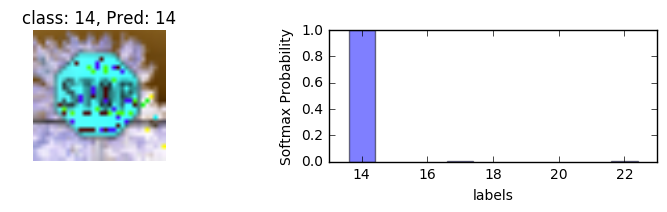

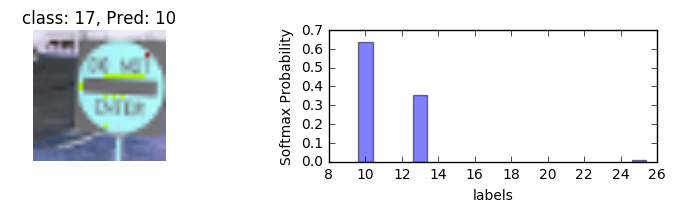

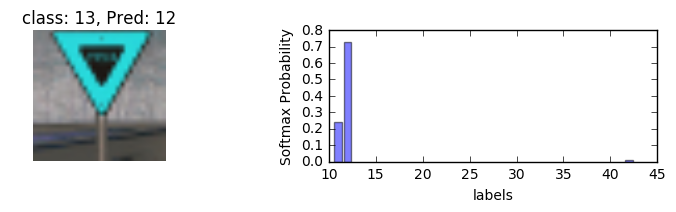

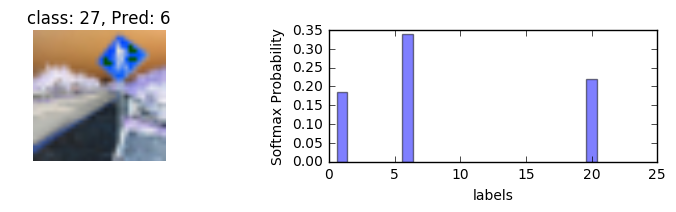

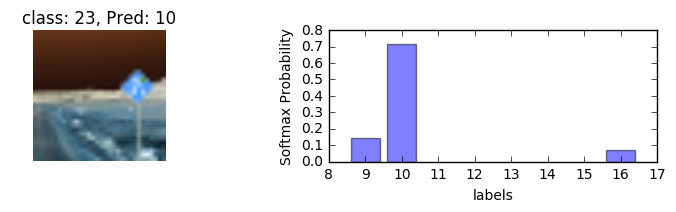

In [19]:
def plot_prob_topk3(images, labels, predictions, topk3):
    
    indexes = list(range(3))
    for i in range(0,5):
        plt.figure(figsize=(50, 20))
        plt.subplot(10,10,1)
        plt.axis('off')
        plt.title('class: {0}, Pred: {1}'.format(labels[i], predictions[i]))
        plt.imshow(images[i])
        
        plt.subplot(10,10,2)
        plt.bar(topk3.indices[i], topk3.values[i], align='center', alpha=0.5)
        plt.ylabel('Softmax Probability')
        plt.xlabel('labels')
        plt.show() 


with tf.Session() as sess:
    topk3 = sess.run(tf.nn.top_k(tf.constant(softmax_probabilties), k=3))
    print(topk3.values)
    print(topk3.indices)
    plot_prob_topk3(X_test_images, y_test_images, predictions, topk3)
#     for i, p in enumerate(topk3.values):
#         fig, ax = plt.subplots()
#         ax.bar(np.arange(3), p, 0.3, color='r', align='center')
#         ax.set_xlabel('labels')
#         ax.set_ylabel('probability')
#         ax.set_title("image{} softmax probabilities".format(i+1))
#         ax.set_xticks(np.arange(3))
#         ax.set_yticks(np.arange(0, 1.1, .1))
#         ax.set_xticklabels(topk3.indices[i])
#         plt.show()



### Answer: Certainity of predictions

If if look at top-k(=3) probabilities, we will notice that model predicts with absolute certainity, it is usually right. Stop sign prediction is an example of that. The top probability is more than 0.99 and every other class is very low.

Thus, if I were to use this model in self driving car, I would only consider predictions that are made with absolute certainity (> 0.99) as accurate. Every other prediction is probably inaccurate.